In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", palette="muted", color_codes=True)
pd.set_option("display.width", 1000)

In [ ]:
bs_data = pd.read_csv("C:/Users/emirh/Downloads/full_data.csv")

In [2]:
path="C:/Users/emirh/Downloads/full_data.csv"

In [ ]:
bs_data

In [ ]:
bs_data.info()

In [20]:
from os import stat


class DataOperation:
    
    def __init__(self,data):
        self.data=data
        self.df = pd.read_csv(self.data)
        
        
    def data_preview(self):

        self.df.columns = self.df.columns.str.lower()
        print(self.df.head())
        print("*"*40)
        print(f"Shape of data: {self.df.shape}")
        print("*"*40)
        print(self.df.info())
        print("*"*40)
        print(self.df.describe().T)

    def data_summary(self):
        discrete = [var for var in self.df.columns if self.df[var].dtype!="O" and self.df[var].nunique()<10]
        continuous = [var for var in self.df.columns if self.df[var].dtype!="O" and var!="stroke" and var not in discrete ]
        categorical = [var for var in self.df.columns if self.df[var].dtype=="O"]
        cardinality = self.df[categorical].nunique()
        mixed_var = discrete + categorical

        print(f"Total Discrete Variables: {len(discrete)} --> {discrete}")
        print(f"Total Continuous Variables: {len(continuous)} --> {continuous}")
        print(f"Total Categorical Variables: {len(categorical)} --> {categorical}")
        print("*"*40)
        print(f"Cardinality: \n{cardinality}")
        for col in self.df[mixed_var]:
            print("*"*40)
            print(f"Counts of unique values for variables:\n{col} \n{self.df[col].value_counts()}")

    def numerical_vis(self):
        global continuous

        for col in self.df[continuous]:
            
            fig, ax = plt.subplots(1, 2, sharex=True,figsize=(12, 6))
            sns.despine(left=True)

            sns.histplot(x=self.df[col],ax=ax[0],kde=True)
            sns.boxplot(x=self.df[col],ax=ax[1])
            
            plt.show() 
              
    def mixed_vis(self):
        m_viz = [var for var in self.df.columns if self.df[var].dtype!="O" and self.df[var].nunique()<10] and [var for var in self.df.columns if self.df[var].dtype=="O"]
        
        for col in self.df[m_viz]:
            
            fig = plt.figure(figsize=(12,6))

            sns.countplot(x=self.df[col])
            plt.show()
    
    def missing_values_analysis(self):
        
        if self.df.isnull().sum().any():
            missing_percent = self.df.isnull().sum()/len(self.df)*100
            missing_total = self.df.isnull().sum()
            missing_table = pd.concat([missing_total,missing_percent],axis=1)
            missing_table.rename(columns={0:"Missing Value",1:"% of Total Value"},inplace=True)
            missing_table.sort_values(by="% of Total Value",ascending=False).round(1)
        else:
            print("There is no missing value.")
    
    #def outlier_analysis(self):

    
    




In [21]:
bs_op = DataOperation(path)
bs_op.data_preview()

   gender   age  hypertension  heart_disease ever_married      work_type residence_type  avg_glucose_level   bmi   smoking_status  stroke
0    Male  67.0             0              1          Yes        Private          Urban             228.69  36.6  formerly smoked       1
1    Male  80.0             0              1          Yes        Private          Rural             105.92  32.5     never smoked       1
2  Female  49.0             0              0          Yes        Private          Urban             171.23  34.4           smokes       1
3  Female  79.0             1              0          Yes  Self-employed          Rural             174.12  24.0     never smoked       1
4    Male  81.0             0              0          Yes        Private          Urban             186.21  29.0  formerly smoked       1
****************************************
Shape of data: (4981, 11)
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 

In [22]:
bs_op.data_summary()

Total Discrete Variables: 3 --> ['hypertension', 'heart_disease', 'stroke']
Total Continuous Variables: 3 --> ['age', 'avg_glucose_level', 'bmi']
Total Categorical Variables: 5 --> ['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status']
****************************************
Cardinality: 
gender            2
ever_married      2
work_type         4
residence_type    2
smoking_status    4
dtype: int64
****************************************
Counts of unique values for variables:
hypertension 
0    4502
1     479
Name: hypertension, dtype: int64
****************************************
Counts of unique values for variables:
heart_disease 
0    4706
1     275
Name: heart_disease, dtype: int64
****************************************
Counts of unique values for variables:
stroke 
0    4733
1     248
Name: stroke, dtype: int64
****************************************
Counts of unique values for variables:
gender 
Female    2907
Male      2074
Name: gender, dtype: int64

In [23]:
bs_op.missing_values_analysis()

There is no missing value.


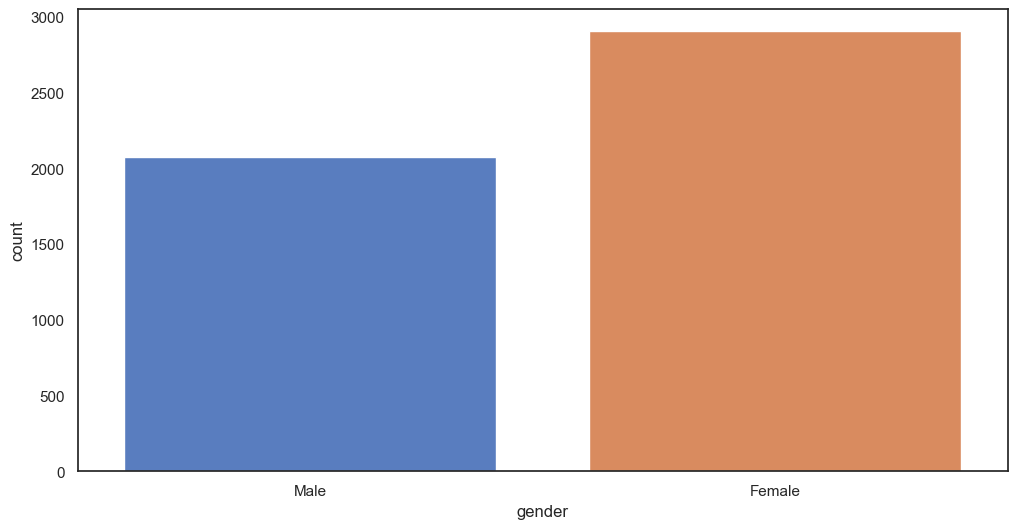

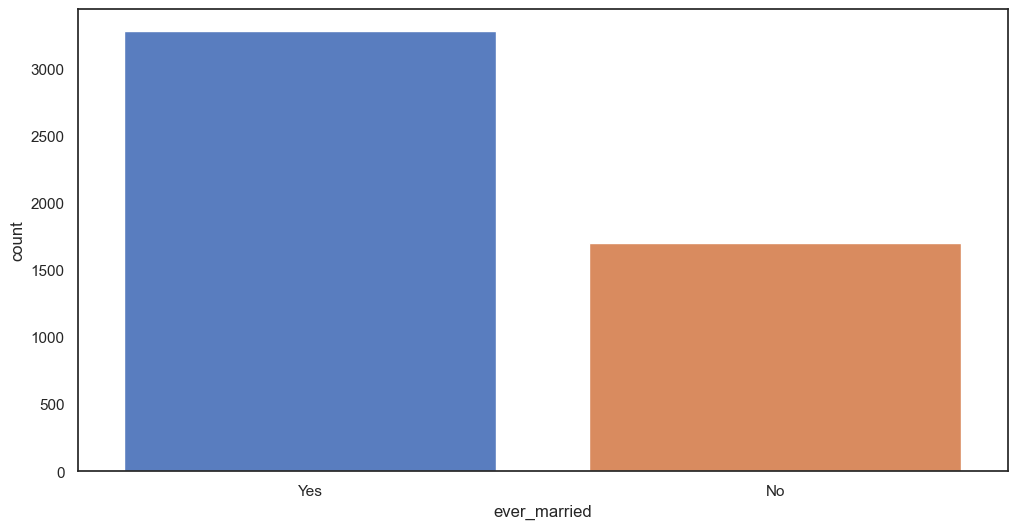

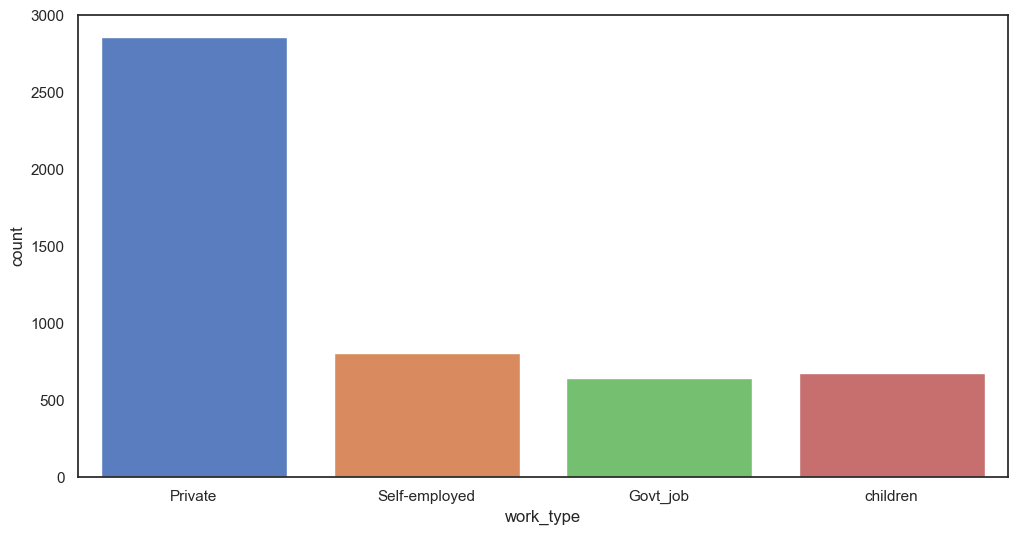

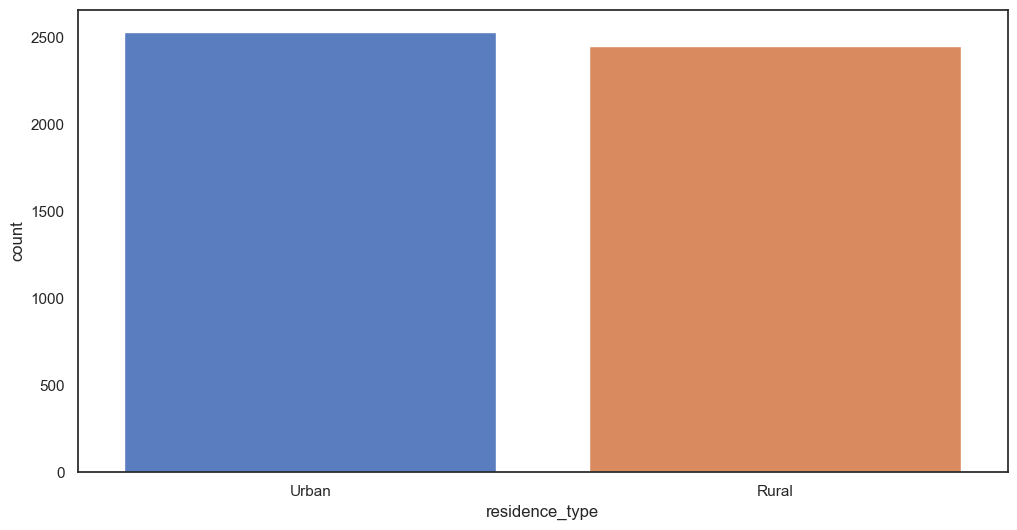

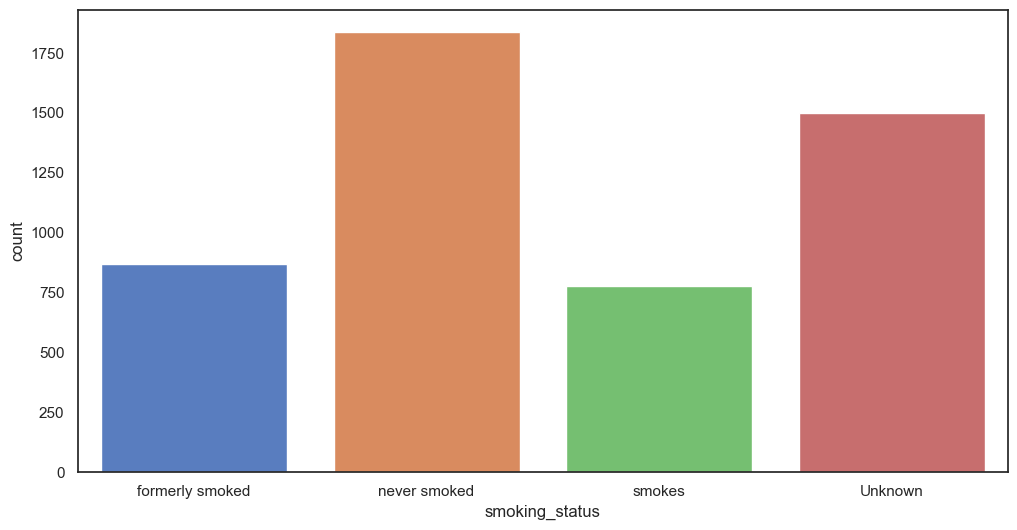

In [24]:
bs_op.mixed_vis()